# libs

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nntool.nnops import NNops

nn_ob = NNops()

# net

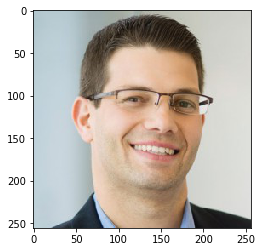

In [3]:
ip = plt.imread("./dummy.jpg")
ip_ = np.ndarray.astype(ip,np.float32)
ip_ = ip_.reshape(-1,ip_.shape[0],ip_.shape[1],ip_.shape[2])
plt.imshow(ip)

![Image of UNET](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

# switch to keras

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv2DTranspose
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import concatenate

Using TensorFlow backend.


In [5]:
ipk = tf.convert_to_tensor(ip_)
ipk

<tf.Tensor 'Const:0' shape=(1, 256, 256, 3) dtype=float32>

In [6]:
# compression
c1 = Conv2D(filters=128, kernel_size=2, 
                   strides=(1,1), padding="SAME", activation='relu', name="conv1")(ipk)
m1 = MaxPooling2D(name="maxpool1")(c1)

c2 = Conv2D(filters=256, kernel_size=2, 
                   strides=(1,1), padding="SAME", activation='relu', name="conv2")(m1)
m2 = MaxPooling2D(name="maxpool2")(c2)

c3 = Conv2D(filters=512, kernel_size=2, 
                   strides=(1,1), padding="SAME", activation='relu', name="conv3")(m2)
m3 = MaxPooling2D(name="maxpool3")(c3)

W0916 17:32:06.822837 139681122281280 deprecation_wrapper.py:119] From /home/s/anaconda3/envs/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 17:32:06.847193 139681122281280 deprecation_wrapper.py:119] From /home/s/anaconda3/envs/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [7]:
for  i in [m1,m2,m3]:
    print(i.name, i.shape)

maxpool1/MaxPool:0 (1, 128, 128, 128)
maxpool2/MaxPool:0 (1, 64, 64, 256)
maxpool3/MaxPool:0 (1, 32, 32, 512)


In [8]:
# expansion
tc3 = UpSampling2D()(m3)
cc3 = concatenate([c3,tc3],axis=3)
ccv3 = Conv2DTranspose(filters=256, kernel_size=2, 
                   strides=(1,1), padding="SAME", activation='relu', name="tc-conv3")(cc3)

tc2 = UpSampling2D()(ccv3)
cc2 = concatenate([c2,tc2],axis=3)
ccv2 = Conv2DTranspose(filters=128, kernel_size=2, 
                   strides=(1,1), padding="SAME", activation='relu', name="tc-conv2")(cc2)

tc1 = UpSampling2D()(ccv2)
cc1 = concatenate([c1,tc1],axis=3)
ccv1 = Conv2DTranspose(filters=3, kernel_size=2, 
                   strides=(1,1), padding="SAME", activation='relu', name="tc-conv2")(cc1)

W0916 17:32:07.039861 139681122281280 deprecation_wrapper.py:119] From /home/s/anaconda3/envs/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 17:32:07.047919 139681122281280 deprecation_wrapper.py:119] From /home/s/anaconda3/envs/ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



In [9]:
for i in [ccv3,ccv2,ccv1]:
    print(i.name, i.shape)

tc-conv3/Relu:0 (1, 64, 64, 256)
tc-conv2/Relu:0 (1, 128, 128, 128)
tc-conv2_1/Relu:0 (1, 256, 256, 3)


In [10]:
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    t = sess.run(ccv1)

W0916 17:32:08.229136 139681122281280 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


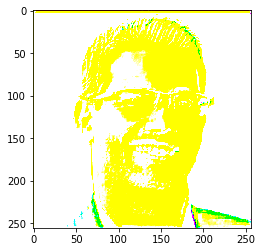

In [11]:
t_ = np.squeeze(t)
plt.imshow(t_,)